In [1]:
from pylab import *
import pandas as pd
import matplotlib.pyplot as plt
import os
import pyAgrum as gum
bn=gum.BayesNet('WaterSprinkler')
print(bn)

BN{nodes: 0, arcs: 0, domainSize: 1, dim: 0}


In [2]:
c=bn.add(gum.LabelizedVariable('c','cloudy ?',2))
print(c)

0


In [3]:
s, r, w = [ bn.add(name, 2) for name in "srw" ] #bn.add(name, 2) === bn.add(gum.LabelizedVariable(name, name, 2))
print (s,r,w)
print (bn)

1 2 3
BN{nodes: 4, arcs: 0, domainSize: 16, dim: 8}


In [4]:
bn.addArc(c,s)

In [5]:
for link in [(c,r),(s,w),(r,w)]:
    bn.addArc(*link)
print(bn)

BN{nodes: 4, arcs: 4, domainSize: 16, dim: 18}


In [6]:
import pyAgrum.lib.notebook as gnb
bn

(pyAgrum.BayesNet<double>@0x561ebd038070) BN{nodes: 4, arcs: 4, domainSize: 16, dim: 18}

In [7]:
from sklearn import datasets

iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [8]:
datas = pd.DataFrame(iris['data'], columns=iris['feature_names'])
datas.loc[:,'class of iris'] = iris['target']

In [9]:
import numpy

disc=6 # Disc(retization) may be between 2 and 9
r=numpy.array(range(disc+1))/(1.0*disc)

# quantiles are building using pandas.qcut
# The "class" column is just copied.
l=[]
for col in datas.columns.values:
    if col!="class of iris":
        l.append(pd.DataFrame(pd.qcut(datas[col],r),columns=[col]))
    else:
        l.append(pd.DataFrame(datas[col],columns=[col]))
treated=pd.concat(l, join='outer', axis=1)

treated.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class of iris
0,"(5.0, 5.4]","(3.417, 4.4]","(0.999, 1.5]","(0.099, 0.2]",0
1,"(4.2989999999999995, 5.0]","(2.9, 3.0]","(0.999, 1.5]","(0.099, 0.2]",0
2,"(4.2989999999999995, 5.0]","(3.0, 3.2]","(0.999, 1.5]","(0.099, 0.2]",0
3,"(4.2989999999999995, 5.0]","(3.0, 3.2]","(0.999, 1.5]","(0.099, 0.2]",0
4,"(4.2989999999999995, 5.0]","(3.417, 4.4]","(0.999, 1.5]","(0.099, 0.2]",0


In [37]:
treated['class of iris'].unique()

array([0, 1, 2])

Learned in 0.706703ms


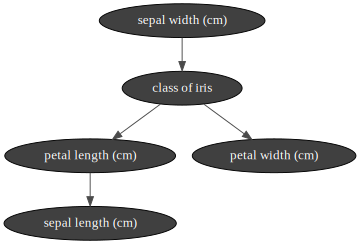

In [10]:
#we put the discretized values in a csv file in order to be learned by pyAgrum
treated.to_csv("irisTreated.csv",index=False)

learner=gum.BNLearner("irisTreated.csv")
learner.useLocalSearchWithTabuList()
bn_iris=learner.learnBN()
print("Learned in {0}ms".format(1000*learner.currentTime()))
gnb.showBN(bn_iris)

In [46]:
bn_iris.cpt('class of iris')

(pyAgrum.Potential<double>@0x561ebd8bd460) 
      ||  class of iris              |
sepal ||0        |1        |2        |
------||---------|---------|---------|
(1.999|| 0.0318  | 0.6348  | 0.3333  |
(2.7, || 0.0437  | 0.5402  | 0.4161  |
(2.9, || 0.2314  | 0.3079  | 0.4607  |
(3.0, || 0.3747  | 0.2506  | 0.3747  |
(3.2, || 0.6086  | 0.1131  | 0.2783  |
(3.417|| 0.8764  | 0.0022  | 0.1214  |

Learned in 0.492916ms


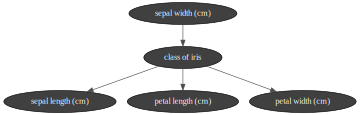

In [11]:
learner=gum.BNLearner("irisTreated.csv")
learner.useGreedyHillClimbing()
bn_iris2=learner.learnBN()
print("Learned in {0}ms".format(1000*learner.currentTime()))
gnb.showBN(bn_iris2)

In [15]:
bn_iris2.cpt('sepal width (cm)')

(pyAgrum.Potential<double>@0x561ebd8f8540) 
  sepal width (cm)                                         |
(1.999, 2|(2.7, 2.9|(2.9, 3.0|(3.0, 3.2|(3.2, 3.4|(3.417, 4|
---------|---------|---------|---------|---------|---------|
 0.2196  | 0.1600  | 0.1733  | 0.1600  | 0.1203  | 0.1667  |

In [16]:
bn_iris2.cpt('sepal length (cm)')

(pyAgrum.Potential<double>@0x561ebd0e3240) 
      ||  sepal length (cm)                                        |
class ||(4.298999|(5.0, 5.4|(5.4, 5.8|(5.8, 6.3|(6.3, 6.7|(6.7, 7.9|
------||---------|---------|---------|---------|---------|---------|
0     || 0.5574  | 0.3389  | 0.1004  | 0.0011  | 0.0011  | 0.0011  |
1     || 0.0607  | 0.0607  | 0.3587  | 0.2991  | 0.1600  | 0.0607  |
2     || 0.0210  | 0.0011  | 0.1004  | 0.2594  | 0.2792  | 0.3389  |

In [17]:
bn_iris2.cpt('class of iris')

(pyAgrum.Potential<double>@0x561ebd9e1130) 
      ||  class of iris              |
sepal ||0        |1        |2        |
------||---------|---------|---------|
(1.999|| 0.0318  | 0.6348  | 0.3333  |
(2.7, || 0.0437  | 0.5402  | 0.4161  |
(2.9, || 0.2314  | 0.3079  | 0.4607  |
(3.0, || 0.3747  | 0.2506  | 0.3747  |
(3.2, || 0.6086  | 0.1131  | 0.2783  |
(3.417|| 0.8764  | 0.0022  | 0.1214  |

In [ ]:
bn_iris3.cpt()

In [44]:
bn_iris3 = gum.fastBN("sepal width (cm) -> class of iris -> petal length (cm)")
bn_iris3

(pyAgrum.BayesNet<double>@0x561ebdc29eb0) BN{nodes: 3, arcs: 2, domainSize: 8, dim: 10}

In [45]:
bn_iris3.cpt('class of iris')

(pyAgrum.Potential<double>@0x561ebd7fd1e0) 
      ||  class of iris    |
sepal ||0        |1        |
------||---------|---------|
0     || 0.4267  | 0.5733  |
1     || 0.1609  | 0.8391  |

In [48]:
ie=gum.LazyPropagation(bn_iris2)

In [49]:
ie.makeInference()
print (ie.posterior("class of iris"))


  class of iris              |
0        |1        |2        |
---------|---------|---------|
 0.3333  | 0.3333  | 0.3333  |



In [50]:
ie.setEvidence({'sepal width (cm)':'(2.7, 2.9]', 'sepal length (cm)': '(5.0, 5.4]'})
ie.makeInference()
ie.posterior("class of iris")

(pyAgrum.Potential<double>@0x561ebdc2a6e0) 
  class of iris              |
0        |1        |2        |
---------|---------|---------|
 0.3080  | 0.6825  | 0.0096  |